# Proyecto de consolidación 1 Daniel Herraiz


In [ ]:
!pip install -r requirements.txt

#### 1 Descarga de Datos
*Obtener los dataset de manera programática usando la info de la web</p>*

In [21]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata
print(wine_quality.metadata) 

# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [22]:
import pandas as pd

#### 2 Combinar los datos
*Consultando la documentación, el dataframe que nos vale es* `wine_quality.data.original`

*Comprobamos que es así, y además ya están unidos los dos dataset en uno (red y white)*

In [23]:
df_wine = wine_quality.data.original
print(df_wine['color'].value_counts())
df_wine.head()

color
white    4898
red      1599
Name: count, dtype: int64


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


*Obtenemos la información del dataframe*

In [24]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [25]:
df_wine.shape

(6497, 13)

In [26]:
df_wine.dtypes.value_counts()

float64    11
int64       1
object      1
Name: count, dtype: int64

In [27]:
print(df_wine.size)
print(df_wine.shape)
print(df_wine.columns)

84461
(6497, 13)
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


*Separamos las variables según su tipo*

In [28]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

num_list = []
cat_list = []

for column in df_wine.columns:
    if is_numeric_dtype(df_wine[column]):
        num_list.append(column)
    else:
        cat_list.append(column)

print(f'Numericas: {num_list}')
print(f'Categóricas: {cat_list}')

Numericas: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Categóricas: ['color']


In [29]:
df_wine.describe(include='number')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


*Tiene 6497 registros, 13 variables de las cuales 11 son decimales, 1 entero y 1 object (texto)*


### 3 Filtrar Atípicos y manejar datos ausentes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Pintamos los box plots. A primera vista, aparecen bastantes datos atípicos*

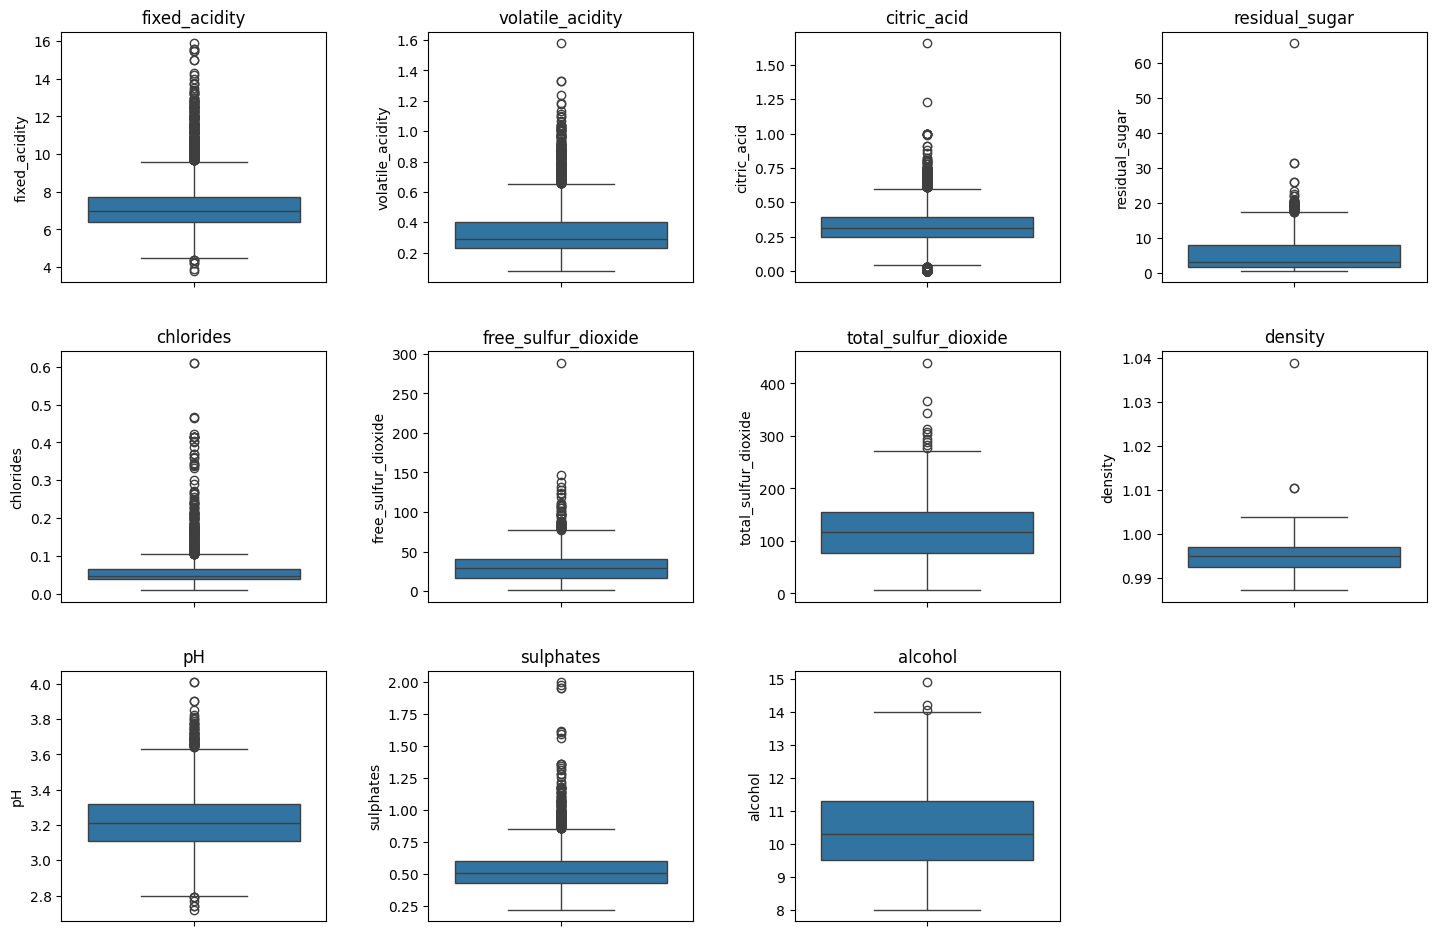

In [34]:
df_wine_inputs = df_wine.iloc[:,:11]#Eliminamos las columnas que no representan inpus cuantitativos 
df_wine_nocolor = df_wine.iloc[:,:12]
plt.figure(figsize=(15, 10))
for i, column in enumerate (df_wine_inputs.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_wine_inputs[column])  
    plt.title(column)

plt.tight_layout(pad=3.0)
plt.show()

Realizaremos dos tests de normalidad para ver qué método de detección de outliers es más adecuado:

Test Shapiro-Wilk

In [36]:
from scipy import stats

In [37]:
resultados = {}

for col in df_wine_inputs.columns:
    stat, p_valor = stats.shapiro(df_wine_inputs[col].dropna())  # Se usa dropna() para eliminar valores ausentes
    resultados[col] = {'estadistico': stat, 'p_valor': p_valor}
    print(f"Columna: {col} - Estadístico: {stat:.3f}, p-valor: {p_valor:.3f}")
    if p_valor > 0.05:
        print("  → Se puede asumir que la distribución es normal.\n")
    else:
        print("  → La distribución no es normal.\n")

Columna: fixed_acidity - Estadístico: 0.880, p-valor: 0.000
  → La distribución no es normal.

Columna: volatile_acidity - Estadístico: 0.876, p-valor: 0.000
  → La distribución no es normal.

Columna: citric_acid - Estadístico: 0.965, p-valor: 0.000
  → La distribución no es normal.

Columna: residual_sugar - Estadístico: 0.825, p-valor: 0.000
  → La distribución no es normal.

Columna: chlorides - Estadístico: 0.618, p-valor: 0.000
  → La distribución no es normal.

Columna: free_sulfur_dioxide - Estadístico: 0.941, p-valor: 0.000
  → La distribución no es normal.

Columna: total_sulfur_dioxide - Estadístico: 0.983, p-valor: 0.000
  → La distribución no es normal.

Columna: density - Estadístico: 0.968, p-valor: 0.000
  → La distribución no es normal.

Columna: pH - Estadístico: 0.991, p-valor: 0.000
  → La distribución no es normal.

Columna: sulphates - Estadístico: 0.899, p-valor: 0.000
  → La distribución no es normal.

Columna: alcohol - Estadístico: 0.954, p-valor: 0.000
  → La

c:\Users\paula\anaconda3\envs\PC1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6497.
  res = hypotest_fun_out(*samples, **kwds)


Test Anderson-Darling para solventar la longitud de la muestra

In [38]:
resultados = {}

for col in df_wine_inputs.columns:
    stat, p_valor = stats.normaltest(df_wine_inputs[col])  # Se usa dropna() para eliminar valores ausentes
    resultados[col] = {'estadistico': stat, 'p_valor': p_valor}
    print(f"Columna: {col} - Estadístico: {stat:.3f}, p-valor: {p_valor:.3f}")
    if p_valor > 0.10:
        print("  → Se puede asumir que la distribución es normal.\n")
    else:
        print("  → La distribución no es normal.\n")

Columna: fixed_acidity - Estadístico: 2337.630, p-valor: 0.000
  → La distribución no es normal.

Columna: volatile_acidity - Estadístico: 1786.142, p-valor: 0.000
  → La distribución no es normal.

Columna: citric_acid - Estadístico: 587.487, p-valor: 0.000
  → La distribución no es normal.

Columna: residual_sugar - Estadístico: 1924.789, p-valor: 0.000
  → La distribución no es normal.

Columna: chlorides - Estadístico: 7036.609, p-valor: 0.000
  → La distribución no es normal.

Columna: free_sulfur_dioxide - Estadístico: 2017.943, p-valor: 0.000
  → La distribución no es normal.

Columna: total_sulfur_dioxide - Estadístico: 56.992, p-valor: 0.000
  → La distribución no es normal.

Columna: density - Estadístico: 1125.820, p-valor: 0.000
  → La distribución no es normal.

Columna: pH - Estadístico: 178.269, p-valor: 0.000
  → La distribución no es normal.

Columna: sulphates - Estadístico: 2742.609, p-valor: 0.000
  → La distribución no es normal.

Columna: alcohol - Estadístico: 44

*Calculando los Zscore, estableciendo un criterio de zscore para considerarlos atípicos, y mostrando los resultados podemos tener una lista de todos los registros con datos atípicos.*

*Creamos una función y una tabla para realizar la prueba con distintos umbrales*

In [39]:
def detect_outliers(df, threshold):
    z_scores = np.abs((df - df.mean()) / df.std())
    outliers = (z_scores > threshold).any(axis=1)
    total_outliers = outliers.sum()
    return total_outliers

In [40]:
thresholds = [3, 4, 5, 6, 7]
outliers_data = []

for t in thresholds:
    total_outliers = detect_outliers(df_wine_nocolor, t)
    outliers_data.append({'Threshold': t, 'Total Outliers': total_outliers})

outliers_df = pd.DataFrame(outliers_data)
print(outliers_df)

   Threshold  Total Outliers
0          3             508
1          4             188
2          5              77
3          6              49
4          7              31


*Una opción que he visto útil nos permitiría sacar una lista ordenada de los valores más atípicos identificando la fila y columna*

*Obteniendo los 10 valores con zscore más alto, son fáciles de identificar con los boxplot pintados antes*

In [41]:
z_scores = np.abs((df_wine_nocolor - df_wine_nocolor.mean()) / df_wine_nocolor.std())
z_scores_melted = z_scores.reset_index().melt(id_vars='index', var_name='column', value_name='z_score')
top_outliers = z_scores_melted.sort_values(by='z_score', ascending=False).head(10)
print("Top 10 atípicos basado en zscores:")
print(top_outliers)

Top 10 atípicos basado en zscores:
       index               column    z_score
26246    258            chlorides  15.840967
26139    151            chlorides  15.812423
49859   4380              density  14.767654
38829   6344  free_sulfur_dioxide  14.562446
23871   4380       residual_sugar  12.685846
26094    106            chlorides  11.730628
26069     81            chlorides  11.644996
26680    692            chlorides  10.446147
26742    754            chlorides  10.246338
27358   1370            chlorides  10.246338


*Cálculo de valores atípicos con el método IQR*

In [ ]:
# Calcular Q1, Q3 y el IQR para todas las columnas
Q1 = df_wine_inputs.iloc[:, :11].quantile(0.25)
Q3 = df_wine_inputs.iloc[:, :11].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar eliminando las filas con valores fuera del rango en **cualquier** columna
df_aux = df_wine.iloc[:, :11]
df_wine_clean_outliers = df_wine[~((df_wine_inputs < lower_bound) | (df_wine_inputs > upper_bound)).any(axis=1)]

# Mostrar el resultado
print(f"Filas originales: {df_aux.shape[0]}")
print(f"Filas después de eliminar outliers: {df_wine_clean_outliers.shape[0]}")

Filas originales: 6497
Filas después de eliminar outliers: 5024


In [57]:
df_wine_clean_outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


*IQR*: Es un método robusto ya que utiliza percentiles (Q1 y Q3) y la mediana, lo que lo hace menos sensible a la presencia de outliers. Funciona bien incluso si los datos no siguen una distribución normal.

*Z-score*: Se basa en la media y la desviación estándar, y es muy útil cuando los datos se distribuyen de manera aproximadamente normal. Permite identificar valores que se alejan más de cierta cantidad de desviaciones estándar de la media.

**Debido a que los test de normalidad apuntan a que las variables que estamos estudiando no siguen una distribución aproximadamente normal, elegimos el método de IQR para la limpieza de atípicos y el análisis de los siguientes apartados.**

*Limpieza de datos ausentes*

In [58]:
df_wine_clean_outliers.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [59]:
print(f"Total de filas originales: {len(df_wine_clean_outliers)}")
df_wine_clean=df_wine_clean_outliers.dropna()
print(f"Total de filas tras limpiar vacíos: {len(df_wine_clean_outliers)}")

Total de filas originales: 5024
Total de filas tras limpiar vacíos: 5024


### 4 Almacenar los datos limpios en SQLite

*Creamos una base de datos en el mismo directorio y cargo el dataframe limpio*

In [60]:
import sqlite3

conn = sqlite3.connect('dbpc1.db')
df_wine_clean.to_sql('wines', conn, if_exists='replace', index=False)

5024

### 5 Consultas en SQLite

In [61]:
# Consulta 1: Promedio de calidad por tipo de vino
query_1 = """
SELECT color, AVG(quality) as avg_quality
FROM wines
GROUP BY color;
"""

avg_quality_by_type = pd.read_sql_query(query_1, conn)
print(avg_quality_by_type)


   color  avg_quality
0    red     5.677326
1  white     5.925046


In [62]:
# Consulta 2: Conteo de vinos con alcohol > 10.5, agrupado por tipo
query_2 = """
SELECT color, COUNT(*) as wine_count
FROM wines
WHERE alcohol > 10.5
GROUP BY color;
"""

count_alcohol_by_type = pd.read_sql_query(query_2, conn)
print(count_alcohol_by_type)

   color  wine_count
0    red         263
1  white        2042


In [68]:
# Consulta 3: Conteo de vinos por nivel de acidez agrupados en rangos
query_3 = """
SELECT 
    CASE 
        WHEN "fixed_acidity" BETWEEN 0 AND 5 THEN '0-5'
        WHEN "fixed_acidity" BETWEEN 5 AND 10 THEN '5-10'
        WHEN "fixed_acidity" BETWEEN 10 AND 15 THEN '10-15'
        ELSE '15+' 
    END AS acidity_range, 
    COUNT(*) as wine_count
FROM wines
GROUP BY acidity_range
ORDER BY 
    CASE 
        WHEN "fixed_acidity" BETWEEN 0 AND 5 THEN 1
        WHEN "fixed_acidity" BETWEEN 5 AND 10 THEN 2
        WHEN "fixed_acidity" BETWEEN 10 AND 15 THEN 3
        ELSE 4 
    END;

"""

count_acidity_ranges = pd.read_sql_query(query_3, conn)
print(count_acidity_ranges)

  acidity_range  wine_count
0           0-5          35
1          5-10        4989


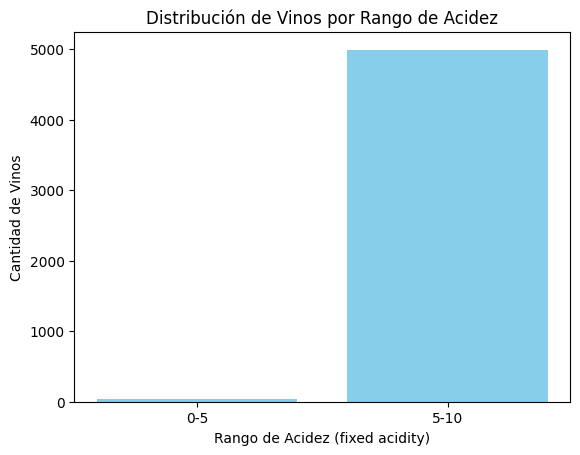

In [ ]:
# Creamos un histograma para visualizar los intervalos más fácilmente
plt.bar(count_acidity_ranges['acidity_range'], count_acidity_ranges['wine_count'], color='skyblue')
plt.xlabel('Rango de Acidez (fixed acidity)')
plt.ylabel('Cantidad de Vinos')
plt.title('Distribución de Vinos por Rango de Acidez')
plt.show()


*Vemos que los resultados coinciden con el boxplot, por lo que no hay ningún valor de fixed_acidity mayor que 10*

### 6. Exportar datos a JSONLines

*De cara a pasarlo a una base de datos noSQL podríamos hacerlo transformando el dataframe en un diccionario*

In [70]:
dict_vinos = df_wine_clean.to_dict("records")
# con records se pone por filas

In [71]:
dict_vinos

[{'fixed_acidity': 7.9,
  'volatile_acidity': 0.6,
  'citric_acid': 0.06,
  'residual_sugar': 1.6,
  'chlorides': 0.069,
  'free_sulfur_dioxide': 15.0,
  'total_sulfur_dioxide': 59.0,
  'density': 0.9964,
  'pH': 3.3,
  'sulphates': 0.46,
  'alcohol': 9.4,
  'quality': 5,
  'color': 'red'},
 {'fixed_acidity': 7.5,
  'volatile_acidity': 0.5,
  'citric_acid': 0.36,
  'residual_sugar': 6.1,
  'chlorides': 0.071,
  'free_sulfur_dioxide': 17.0,
  'total_sulfur_dioxide': 102.0,
  'density': 0.9978,
  'pH': 3.35,
  'sulphates': 0.8,
  'alcohol': 10.5,
  'quality': 5,
  'color': 'red'},
 {'fixed_acidity': 6.7,
  'volatile_acidity': 0.58,
  'citric_acid': 0.08,
  'residual_sugar': 1.8,
  'chlorides': 0.097,
  'free_sulfur_dioxide': 15.0,
  'total_sulfur_dioxide': 65.0,
  'density': 0.9959,
  'pH': 3.28,
  'sulphates': 0.54,
  'alcohol': 9.2,
  'quality': 5,
  'color': 'red'},
 {'fixed_acidity': 7.5,
  'volatile_acidity': 0.5,
  'citric_acid': 0.36,
  'residual_sugar': 6.1,
  'chlorides': 0.071,

*También se puede transformándolo directamente en un json*

In [72]:
df_wine_clean.to_json("datos.jsonl", orient="records", lines=True)

*Usando jsonlines*

In [73]:
import jsonlines
from datetime import datetime

In [74]:
# Guardar en JSONL con jsonlines
with jsonlines.open("wines.jsonl", mode="w") as writer:
    writer.write_all(df_wine_clean.to_dict(orient="records"))

In [ ]:
# mostramos como es el json generado
with jsonlines.open("wines.jsonl", mode="r") as reader:
    for obj in reader:
        print(obj)

{'fixed_acidity': 7.9, 'volatile_acidity': 0.6, 'citric_acid': 0.06, 'residual_sugar': 1.6, 'chlorides': 0.069, 'free_sulfur_dioxide': 15.0, 'total_sulfur_dioxide': 59.0, 'density': 0.9964, 'pH': 3.3, 'sulphates': 0.46, 'alcohol': 9.4, 'quality': 5, 'color': 'red'}
{'fixed_acidity': 7.5, 'volatile_acidity': 0.5, 'citric_acid': 0.36, 'residual_sugar': 6.1, 'chlorides': 0.071, 'free_sulfur_dioxide': 17.0, 'total_sulfur_dioxide': 102.0, 'density': 0.9978, 'pH': 3.35, 'sulphates': 0.8, 'alcohol': 10.5, 'quality': 5, 'color': 'red'}
{'fixed_acidity': 6.7, 'volatile_acidity': 0.58, 'citric_acid': 0.08, 'residual_sugar': 1.8, 'chlorides': 0.097, 'free_sulfur_dioxide': 15.0, 'total_sulfur_dioxide': 65.0, 'density': 0.9959, 'pH': 3.28, 'sulphates': 0.54, 'alcohol': 9.2, 'quality': 5, 'color': 'red'}
{'fixed_acidity': 7.5, 'volatile_acidity': 0.5, 'citric_acid': 0.36, 'residual_sugar': 6.1, 'chlorides': 0.071, 'free_sulfur_dioxide': 17.0, 'total_sulfur_dioxide': 102.0, 'density': 0.9978, 'pH': 3

*Para la prueba de añadir una columna que sea un array y una fecha, primero creamos una copia de nuestra dataframe*

In [76]:
df_wine_new = df_wine_clean.copy()

In [77]:
# array
df_wine_new['Indice'] = np.array(range(1,len(df_wine_clean)+1))

In [78]:
with jsonlines.open("wines.jsonl", mode="w") as writer:
    writer.write_all(df_wine_new.to_dict(orient="records"))

In [79]:
# fecha
df_wine_new['Date'] = pd.to_datetime(datetime.now())

In [80]:
with jsonlines.open("wines.jsonl", mode="w") as writer:
    writer.write_all(df_wine_new.to_dict(orient="records"))

TypeError: Object of type Timestamp is not JSON serializable

- El np.array no ha dado problemas ya que ya tiene un formato json
- La fecha hay que pasarla a string para que la lea el jsonl, si no el formato no se acepta

In [81]:
del df_wine_new['Date']
df_wine_new['Date'] = str(pd.to_datetime(datetime.now()))

In [82]:
with jsonlines.open("wines.jsonl", mode="w") as writer:
    writer.write_all(df_wine_new.to_dict(orient="records"))

In [ ]:
# mostramos que se han guardado correctamente las dos columnas nuevas en el json
with jsonlines.open("wines.jsonl", mode="r") as reader:
    for obj in reader:
        print(obj)

{'fixed_acidity': 7.9, 'volatile_acidity': 0.6, 'citric_acid': 0.06, 'residual_sugar': 1.6, 'chlorides': 0.069, 'free_sulfur_dioxide': 15.0, 'total_sulfur_dioxide': 59.0, 'density': 0.9964, 'pH': 3.3, 'sulphates': 0.46, 'alcohol': 9.4, 'quality': 5, 'color': 'red', 'Indice': 1, 'Date': '2025-02-25 20:20:40.044332'}
{'fixed_acidity': 7.5, 'volatile_acidity': 0.5, 'citric_acid': 0.36, 'residual_sugar': 6.1, 'chlorides': 0.071, 'free_sulfur_dioxide': 17.0, 'total_sulfur_dioxide': 102.0, 'density': 0.9978, 'pH': 3.35, 'sulphates': 0.8, 'alcohol': 10.5, 'quality': 5, 'color': 'red', 'Indice': 2, 'Date': '2025-02-25 20:20:40.044332'}
{'fixed_acidity': 6.7, 'volatile_acidity': 0.58, 'citric_acid': 0.08, 'residual_sugar': 1.8, 'chlorides': 0.097, 'free_sulfur_dioxide': 15.0, 'total_sulfur_dioxide': 65.0, 'density': 0.9959, 'pH': 3.28, 'sulphates': 0.54, 'alcohol': 9.2, 'quality': 5, 'color': 'red', 'Indice': 3, 'Date': '2025-02-25 20:20:40.044332'}
{'fixed_acidity': 7.5, 'volatile_acidity': 0.

### 7 Análisis de calidad de los vinos



*Primero separamos en blanco y tinto para realizar el análisis independiente, y empiezo el análisis por el blanco*

In [84]:
# Filtrar los vinos blancos
df_white = df_wine_clean[df_wine_clean['color'] == 'white'].drop(columns=['color'])


# Filtrar los vinos tintos
df_red = df_wine_clean[df_wine_clean['color'] == 'red'].drop(columns=['color'])


*Calculo la correlación de las características químicas con la calidad*

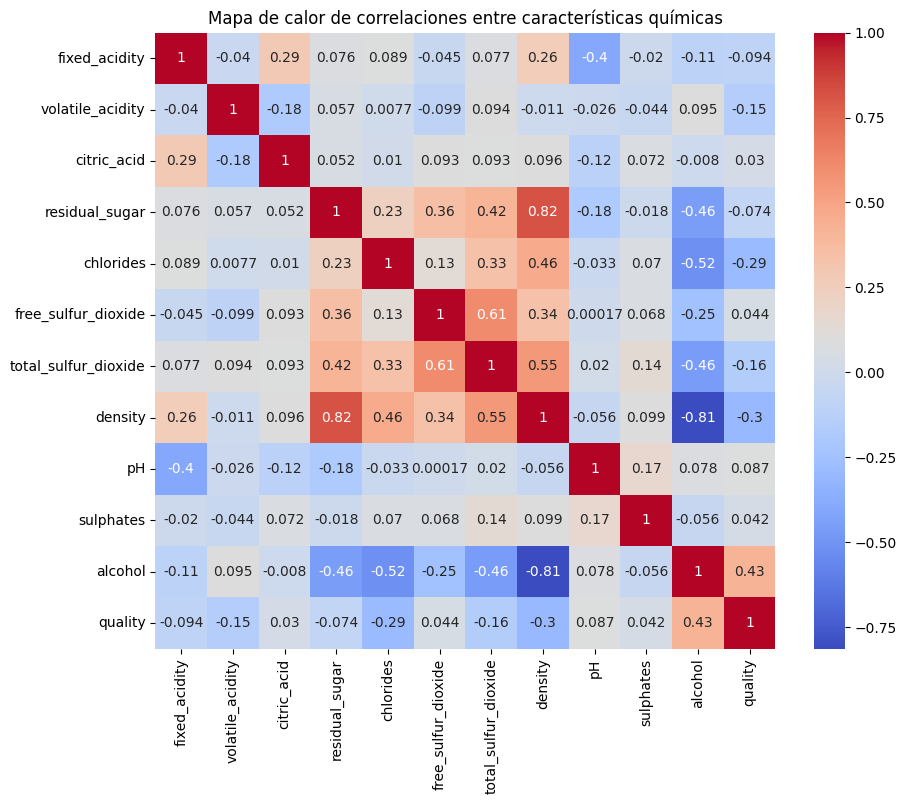

In [85]:
# Correlación de las características químicas con la calidad
correlation = df_white.corr()

# Heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones entre características químicas')
plt.show()

In [86]:
print(correlation['quality'])

fixed_acidity          -0.093654
volatile_acidity       -0.154375
citric_acid             0.030418
residual_sugar         -0.074220
chlorides              -0.291414
free_sulfur_dioxide     0.043774
total_sulfur_dioxide   -0.158308
density                -0.298268
pH                      0.086720
sulphates               0.041580
alcohol                 0.425980
quality                 1.000000
Name: quality, dtype: float64


*Según ésto, se pueden hacer algunas interpretaciones sobre la calidad del vino blanco como:*

- *valores de chlorides y density altos son los que más impactan negativamente a la calidad*

- *los valores altos de alcohol tienen gran impacto positivo en la calidad, otros valores que impactan menos son el pH o el azúcar residual*

- *Podemos mirar los valores de los vinos con más y menos calidad para contrastar la correlación*

In [87]:
print("Vinos blancos con menor calidad:")
df_white.sort_values(by='quality').head()


Vinos blancos con menor calidad:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1850,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
4686,6.1,0.20,0.34,9.5,0.041,38.0,201.0,0.99500,3.14,0.44,10.1,3
3972,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3
1852,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3
3083,7.5,0.32,0.24,4.6,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3


In [88]:
print("Vinos blancos con mayor calidad:")
df_white.sort_values(by='quality', ascending=False).head()

Vinos blancos con mayor calidad:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9


In [89]:
print(df_red.corr()['quality'])

fixed_acidity           0.074271
volatile_acidity       -0.371561
citric_acid             0.204600
residual_sugar         -0.004604
chlorides              -0.237738
free_sulfur_dioxide    -0.103521
total_sulfur_dioxide   -0.338020
density                -0.337253
pH                     -0.016812
sulphates               0.415145
alcohol                 0.526848
quality                 1.000000
Name: quality, dtype: float64


*Según ésto, se pueden hacer algunas interpretaciones sobre la calidad del vino tinto como:*

- *volatile_acidity es la variable que más impacta negativamente, seguida de densidad y total_sulfur_dioxide*

- *los valores altos de alcohol tienen gran impacto positivo en la calidad, seguido de sulfatos y ácido cítrico*

- *Podemos mirar los valores de los vinos con más y menos calidad para contrastar la correlación*

In [90]:
print("Vinos tintos con menor calidad:")
df_red.sort_values(by='quality').head()

Vinos tintos con menor calidad:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
224,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,4
1276,8.5,0.400,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,4
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,4
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4


In [91]:
print("Vinos tintos con mayor calidad:")
df_red.sort_values(by='quality', ascending=False).head()

Vinos tintos con mayor calidad:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1449,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
